In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# 이미지 데이터 생성기 설정
train_dir = '../데이터셋/한국인 감정인식을 위한 복합 영상/Training/split_data/train'
val_dir = '../데이터셋/한국인 감정인식을 위한 복합 영상/Training/split_data/val'
test_dir = '../데이터셋/한국인 감정인식을 위한 복합 영상/Training/split_data/test'

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# 데이터 생성기
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
    ,color_mode='grayscale')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale')



Found 78413 images belonging to 7 classes.
Found 16803 images belonging to 7 classes.
Found 16803 images belonging to 7 classes.


In [2]:
print(tf.__version__)

2.10.0


In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9644699734844623339
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5758779392
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12891183814797424588
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060 Ti, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [4]:
tf.test.is_built_with_cuda()

True

In [5]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [6]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"


In [7]:
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential


# CNN 모델 구성
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(5,5), padding='same', input_shape=(100, 100,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(7,7), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(7, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 요약 출력
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 64)      1664      
                                                                 
 batch_normalization (BatchN  (None, 100, 100, 64)     256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 100, 100, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 50, 50, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 128)       4

In [8]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=25,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size)

Epoch 1/25
2450/2450 [==============================] - 245s 97ms/step - loss: 1.6084 - accuracy: 0.3725 - val_loss: 1.3482 - val_accuracy: 0.4696
Epoch 2/25
2450/2450 [==============================] - 230s 94ms/step - loss: 1.2827 - accuracy: 0.4977 - val_loss: 1.3682 - val_accuracy: 0.4627
Epoch 3/25
2450/2450 [==============================] - 230s 94ms/step - loss: 1.1598 - accuracy: 0.5502 - val_loss: 1.5816 - val_accuracy: 0.4119
Epoch 4/25
2450/2450 [==============================] - 225s 92ms/step - loss: 1.0550 - accuracy: 0.5948 - val_loss: 1.1581 - val_accuracy: 0.5502
Epoch 5/25
2450/2450 [==============================] - 221s 90ms/step - loss: 0.9707 - accuracy: 0.6290 - val_loss: 1.1199 - val_accuracy: 0.5910
Epoch 6/25
2450/2450 [==============================] - 221s 90ms/step - loss: 0.8862 - accuracy: 0.6610 - val_loss: 0.9309 - val_accuracy: 0.6481
Epoch 7/25
2450/2450 [==============================] - 228s 93ms/step - loss: 0.8106 - accuracy: 0.6915 - val_loss: 1

In [9]:
model.evaluate(test_generator)


526/526 [==============================] - 26s 49ms/step - loss: 1.4210 - accuracy: 0.6685


[1.4209973812103271, 0.6685115694999695]

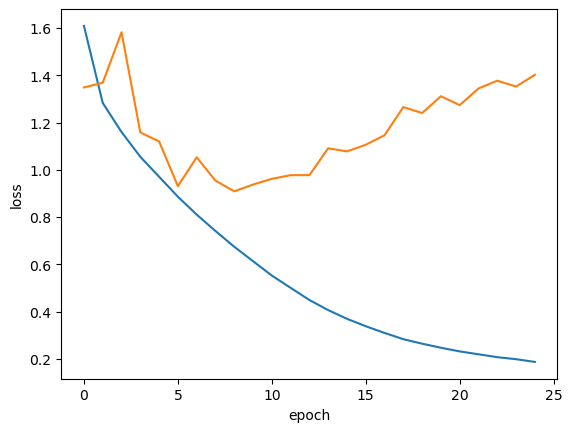

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")

plt.show()